In [2]:
import matplotlib
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
from matplotlib import colors
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 1.0}
figure = {'figsize' : [10.0, 10/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)

import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os #com
import glob2 as glob
from scipy.optimize import curve_fit # pacote para ajuste de curvas
from scipy.signal import find_peaks

In [3]:
#"_m" in the end means "measured"
#"_t" in the end means "theoretical"
#"_f" in the end means "fit"
positions_m = []

In [4]:
d_plates = 7.6e-3
rho_oil = 886
g = 9.81
n_air = 1.88810e-5
b = 8.2e-3
press = 10210
vf = 0.03111e-3 #0.0523e-3#0.0917e-3#0.1614e-3
#0.1301e-3#0.1514e-3#0.0379e-3#0.0571e-3#0.0549e-3#0.0581e-3#0.0905e-3#0.0464e-3
vr = 0.19164e-3 #0.1505e-3#0.2688e-3#0.3750e-3
#0.1402e-3#0.3290e-3#0.2862e-3#0.2163e-3#0.3179e-3#0.2597e-3#0.3801e-3#0.168833e-3

V = 504

In [5]:
a = np.sqrt((b/(2*press))**2+9*n_air*vf/(2*rho_oil*g))-b/(2*press)
q=(4*np.pi/3)*(a**3)*rho_oil*g*d_plates*(vf+vr)/(V*vf)
print("raio =", a)
print("carga =", q)

raio = 2.806124969129333e-07
carga = 8.685865909285543e-20


In [6]:
charges_measured = [1.4256723978792294e-19, 
                    2.7799131371430147e-19, 
                    6.841428093179571e-19, 
                    3.0444177897829467e-19, 
                    2.3419048305283005e-19,
                    1.6512305854173612e-19,
                    1.1852997823112112e-18,
                    5.742610450630125e-19,
                    1.4075904881005605e-18,
                    5.3164349995342675e-19,
                    1.5603666413383012e-19]
n_measured = [1, 2, 4, 2, 1, 1, 7, 4, 9, 3, 1]

data = {'Charges':charges_measured,
        'n':n_measured}
 
# Create DataFrame
df = pd.DataFrame(data)
df.head()

,Charges,n
0,1.425672e-19,1
1,2.779913e-19,2
2,6.841428e-19,4
3,3.044418e-19,2
4,2.341905e-19,1


In [7]:
from lmfit import Model, Parameters

def fir_order(number_e, c0, e):
    return c0 + e*number_e

mod = Model(fir_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['c0', 'e']
independent variables: ['number_e']


In [8]:
params = mod.make_params(c0=0, e=1e-19)
result = mod.fit(df['Charges'], params, number_e=df['n'])

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
c0 = dic_result['c0']
el = dic_result['e']

[[Model]]
    Model(fir_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 11
    # variables        = 2
    chi-square         = 2.1736e-38
    reduced chi-square = 2.4151e-39
    Akaike info crit   = -976.317203
    Bayesian info crit = -975.521412
[[Variables]]
    c0:  6.8474e-21 +/- 2.3683e-20 (345.86%) (init = 0)
    e:   1.5966e-19 +/- 5.8063e-21 (3.64%) (init = 1e-19)
[[Correlations]] (unreported correlations are < 0.250)
    C(c0, e) = -0.780
OrderedDict([('c0', 6.847397478246938e-21), ('e', 1.596561940198391e-19)])


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


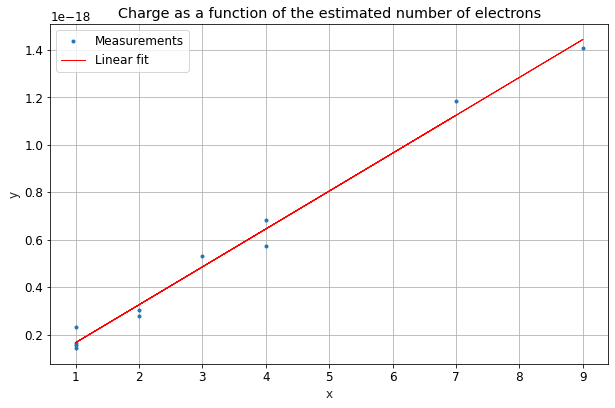

In [9]:
x = n_measured
y = c0+el*np.array(n_measured)
#print(y)

y2 = charges_measured
plt.plot(x, y2, '.', label='Measurements')
plt.plot(x, y, 'r', label="Linear fit")
plt.title('Charge as a function of the estimated number of electrons')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()